In [1]:
from array_processing import signal as sig, steering as stg, doa, moe
import matplotlib.pyplot as plt

In [2]:
# Generate steering vectors for signals arriving with DOA -45, 20 and 65 degrees for an 8 element ULA array with
# separation of half a wavelength

A = stg.generate_ula_vectors_center([-45, 20, 65], 8, 1 / 2)

# Generate 4-QAM symbols for each source and with the desired number of snapshots

S = sig.gen_signal(3, 100)

# Get noise free received symbol matrix X

X = A @ S

# Add some AWGN noise to X

Xn = sig.add_noise(X, 10)

# Forward backward average the signal

Xn = sig.doFBA(Xn)

# Beamformer

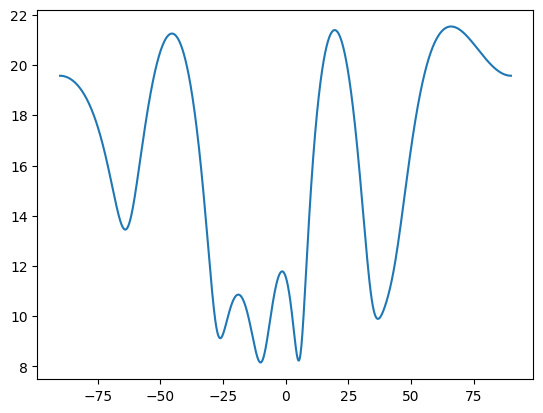

In [3]:
power, angles = doa.beamformer(Xn, 0.1, 1 / 2)
plt.plot(angles, power)

# CAPON - MVDR

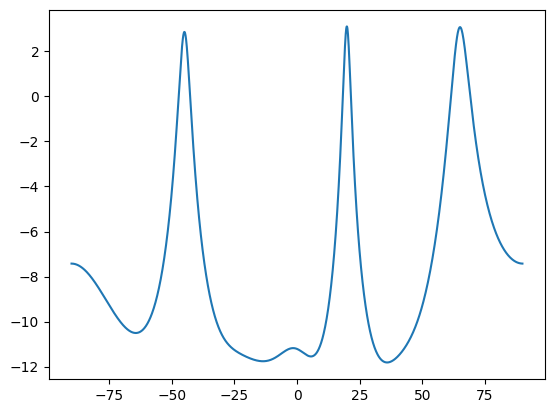

In [4]:
power, angles = doa.CAPON_MVDR(Xn, 0.1, 1/2)

plt.plot(angles, power)

# MUSIC

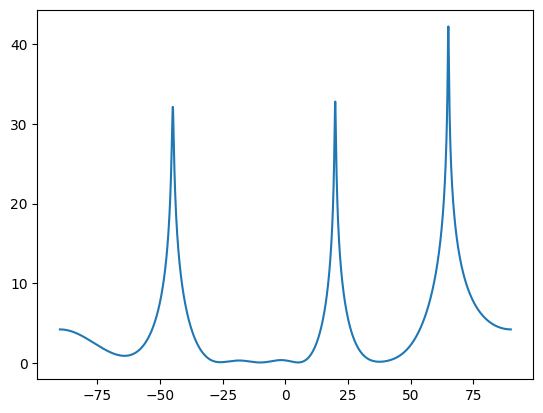

In [5]:
# Estimate the model order of the received signal
mo = moe.AIC(Xn, True)

power, angles = doa.MUSIC(Xn, mo, 0.1, 1/2)

plt.plot(angles, power)

# Min-Norm

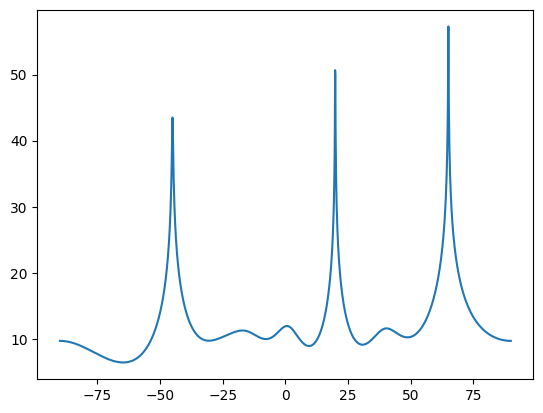

In [6]:
power, angles = doa.Min_Norm(Xn, mo, 0.1, 1/2)

plt.plot(angles, power)

# ESPRIT

In [7]:
doa.ESPRIT(Xn, mo, 1 / 2)

array([ 19.84587935,  64.96440413, -45.10866948])

# Root-MUSIC

In [8]:
doa.Root_MUSIC(Xn, mo, 1 / 2)

array([-45.1632249 ,  66.41314552,  19.44747122])

# SAGE

In [9]:
doa.SAGE(Xn, mo, 0.01, 1 / 2)

array([ 19.85, -44.94,  64.99])

# SML

In [10]:
# Resolution is made low here to allow for a faster estimation. Can be made better at the cost of increased runtime.
doa.SML(Xn, mo, resolution=5)

(-45, 20, 65)

# DML

In [11]:
doa.DML(Xn, mo, resolution=5)

(-45, 20, 65)